#Handwritten digit classification and recognition
using Keras MNIST dataset

CNN

image recognition uploading own handwritting sample numbers.jpg

In [236]:
import cv2 #issue with openCV4 since 2018? 
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow # patch/ class created 


load data

In [237]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [238]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]


## to recognize colors





In [239]:
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1) 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [240]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

creating batch sizes 
can be created later doesnt matter when its done.


In [241]:
# Training Parameters
batch_size = 128
epochs = 5

## Changing the dtype

In [242]:
# change our image type to float32 data type
# googles servers cant handle 64byte encoding. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [243]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [244]:
train_samples = x_train.shape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Hot Encoding:
shortcut to creating Dummy Variables

In [245]:
# Now we one hot encode outputs
# This is the shortcut to creating DUMMY VARIABLES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [246]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes (0-9): " + str(y_test.shape[1]))

Number of Classes (0-9): 10


## helper to shape

In [247]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
# num_classes = 10
# num_pixels = 28 * 28 

fstring print? 

Creating the CNN ??? is this name right??? model

In [248]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compiling the models
mix and baking the models

In [249]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [250]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

### previously


 with the added maxpool inbetween the cov layers the
 
  peramerters were only around 65000 
>>Test loss: 2.2744312286376953

>>Test accuracy: 0.15279999375343323 
>>>>pretty sucky
helps if you remember to rename the variables on the pngs and history to show your work MEL!

second time



conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               204928    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      

>>Total params: 261,962

>>Trainable params: 261,962

>>Non-trainable params: 0
_____________________________________________________________
>>Test loss: 2.175433397293091

>>Test accuracy: 0.4542999863624573

went back to his original model the accuracy was the highest. ..
onv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
=================================================================
Total params: 1,199,882

Trainable params: 1,199,882

Non-trainable params: 0
_________________________________________________________________
Test loss: 2.061180353164673

Test accuracy: 0.6247000098228455

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


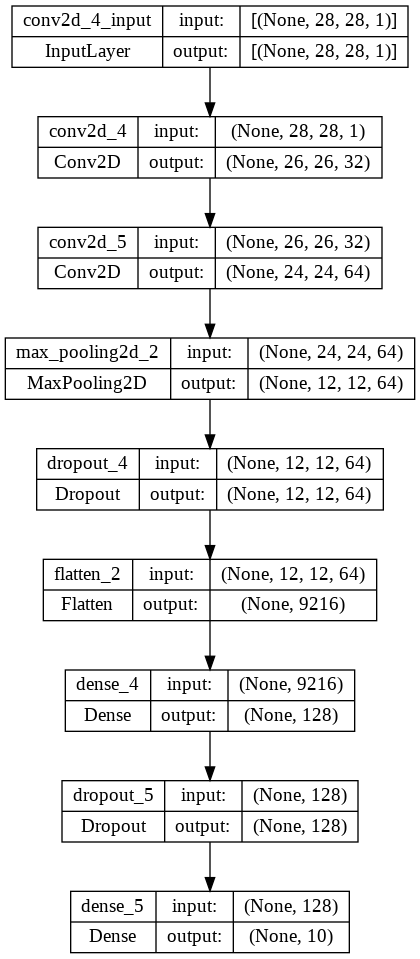

In [252]:
plot_model(model, to_file='/content/drive/MyDrive/PredictiveAnalytics/Projects/CNN-handwriting/model_plot.png', show_shapes=True, show_layer_names=True)

In [253]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 170s 360ms/step - loss: 2.2777 - accuracy: 0.1640 - val_loss: 2.2422 - val_accuracy: 0.3738
Epoch 2/5
469/469 [==============================] - 165s 352ms/step - loss: 2.2236 - accuracy: 0.2661 - val_loss: 2.1754 - val_accuracy: 0.5435
Epoch 3/5
469/469 [==============================] - 166s 353ms/step - loss: 2.1530 - accuracy: 0.3570 - val_loss: 2.0858 - val_accuracy: 0.6261
Epoch 4/5
469/469 [==============================] - 165s 352ms/step - loss: 2.0602 - accuracy: 0.4291 - val_loss: 1.9665 - val_accuracy: 0.6852
Epoch 5/5
469/469 [==============================] - 165s 353ms/step - loss: 1.9384 - accuracy: 0.4929 - val_loss: 1.8120 - val_accuracy: 0.7240


Uses the variable history to plot or flag 🚩👂 the history of the training of the model

best practice remember to change the history name to reflect doing more than one model .... UNLESS YOU NEED TO TAKE THAT BREAK FOR A COFFEE ??


In [254]:
score = model.evaluate(x_test, y_test, verbose=0)

In [255]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8119961023330688
Test accuracy: 0.7239999771118164


In [256]:
model.save('/content/drive/MyDrive/PredictiveAnalytics/Projects/CNN-handwriting/cnn0.h5')

# creating functions 
to identify the handwriten stuff 
define x coodinate function .... thast the stuf


In [257]:

def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10'] / M['m00']))

In [258]:
x_cord_contour

<function __main__.x_cord_contour(contour)>

In [ ]:
contour


In [260]:
def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed

    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square

In [261]:
makeSquare

<function __main__.makeSquare(not_square)>

In [262]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 2
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ",width)
    return ReSizedImg

In [263]:
resize_to_pixel

<function __main__.resize_to_pixel(dimensions, image)>

In [264]:
classifier = load_model('/content/drive/MyDrive/PredictiveAnalytics/Projects/CNN-handwriting/cnn0.h5')

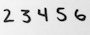

-1

In [282]:
image = cv2.imread('/content/drive/MyDrive/PredictiveAnalytics/Projects/CNN-handwriting/PSX_20221211_230757.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2.waitKey(0)

In [266]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [267]:
edged = cv2.Canny(blurred, 30, 150)

In [268]:
# Find Contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [269]:
#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

In [278]:
# Create empty array to store entire number
full_number = []

In [283]:
# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi) #making the digit the size for the model
        cv2_imshow(roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()

In [284]:
print ("The number is: " + ''.join(full_number))

The number is: 


need to work on image size 